In [1]:
pip install yfinance 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start=datetime(end.year-20, end.month,end.day)


In [4]:
stock = "TSLA"
tesla_data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
tesla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [6]:
tesla_data.shape

(3558, 6)

In [7]:
tesla_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3558.000000,3558.000000,3558.000000,3558.000000,3558.000000,3.558000e+03
mean,75.980486,77.649212,74.206571,75.965720,75.965720,9.692154e+07
std,102.645480,104.929551,100.163552,102.576010,102.576010,7.853743e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,11.622667,11.942667,11.315333,11.656501,11.656501,4.782938e+07
50%,17.483334,17.706667,17.187333,17.470666,17.470666,8.244660e+07
75%,164.629997,169.345005,160.709995,164.752495,164.752495,1.226586e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [8]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3558 entries, 2010-06-29 to 2024-08-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3558 non-null   float64
 1   High       3558 non-null   float64
 2   Low        3558 non-null   float64
 3   Close      3558 non-null   float64
 4   Adj Close  3558 non-null   float64
 5   Volume     3558 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 194.6 KB


In [9]:
tesla_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
pip install Matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Tesla Data')

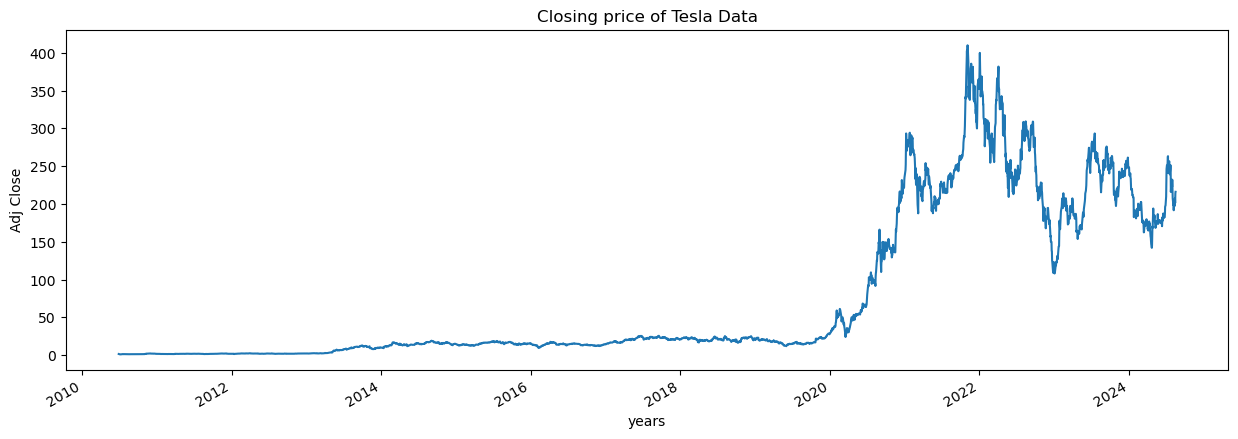

In [12]:
plt.figure(figsize= (15,5))
tesla_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Tesla Data")

In [13]:
def plot_graph(figsize,values, column_name):
 plt.figure()
 values.plot(figsize = figsize)
 plt.xlabel("years")
 plt.ylabel(column_name)
 plt.title(f"{column_name} of Tesla Data")

In [14]:
tesla_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

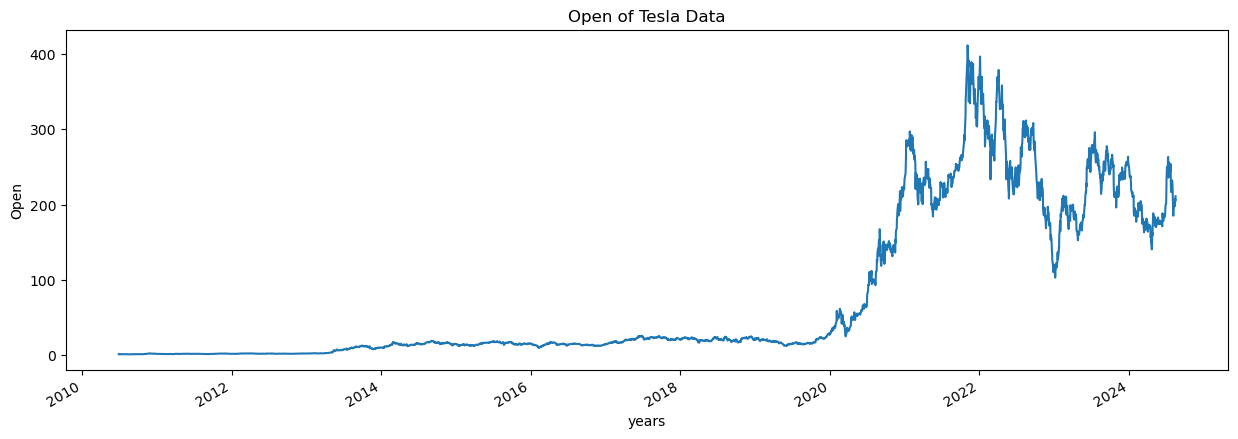

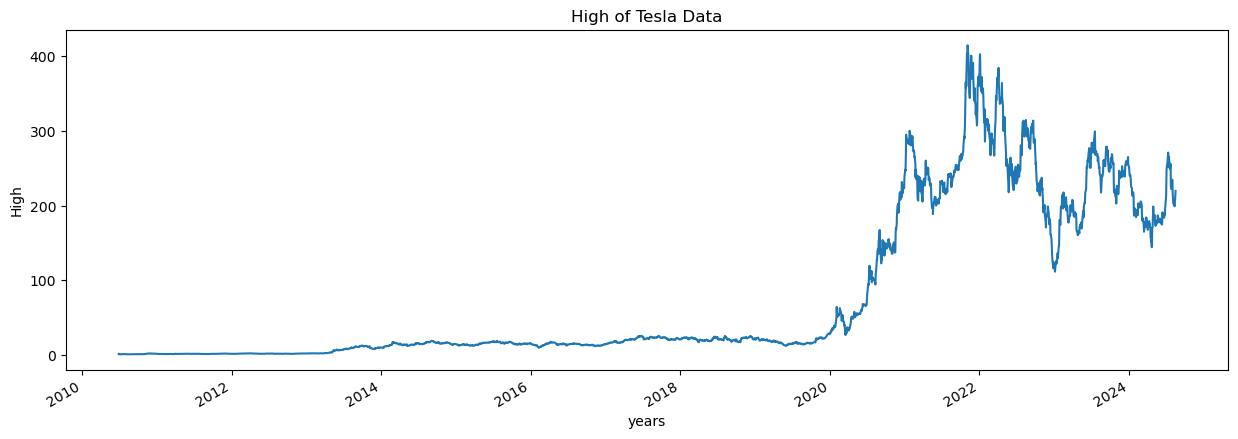

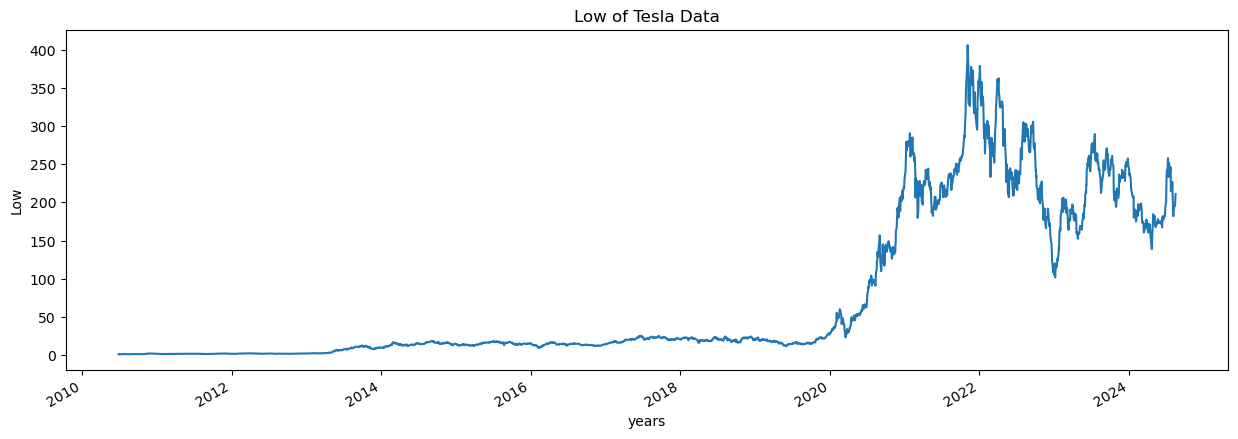

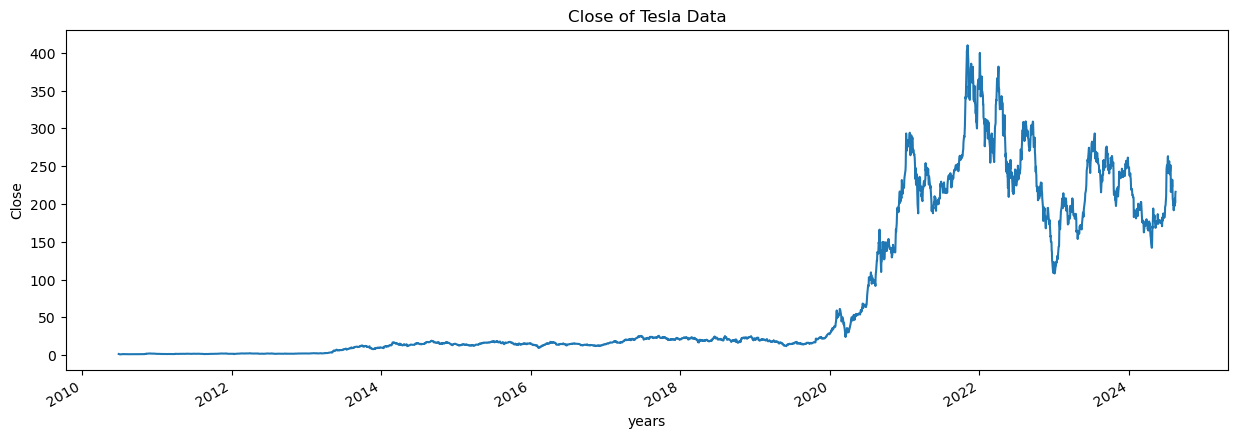

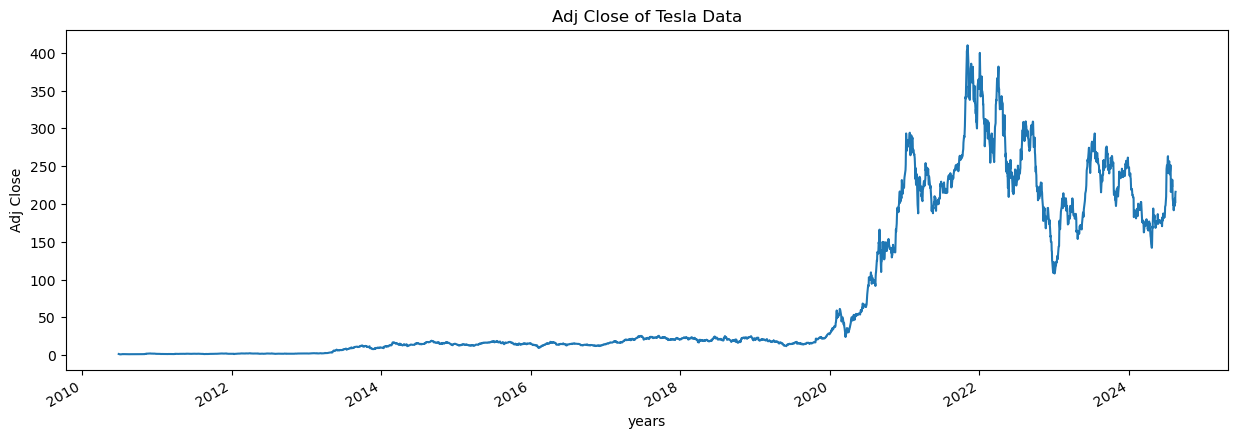

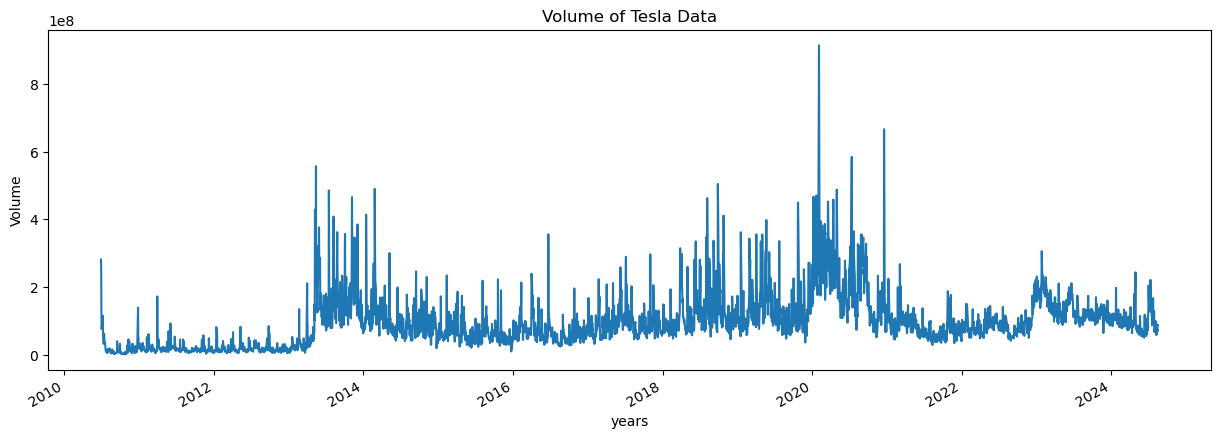

In [15]:
for column in tesla_data.columns:
    plot_graph((15,5),tesla_data[column], column)

In [16]:
import pandas as pd

In [17]:
for i in range(2004, 2025):
    print(i,list(tesla_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 130
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 158


In [18]:
tesla_data['MA_for_50_days'] = tesla_data['Adj Close'].rolling(50).mean()

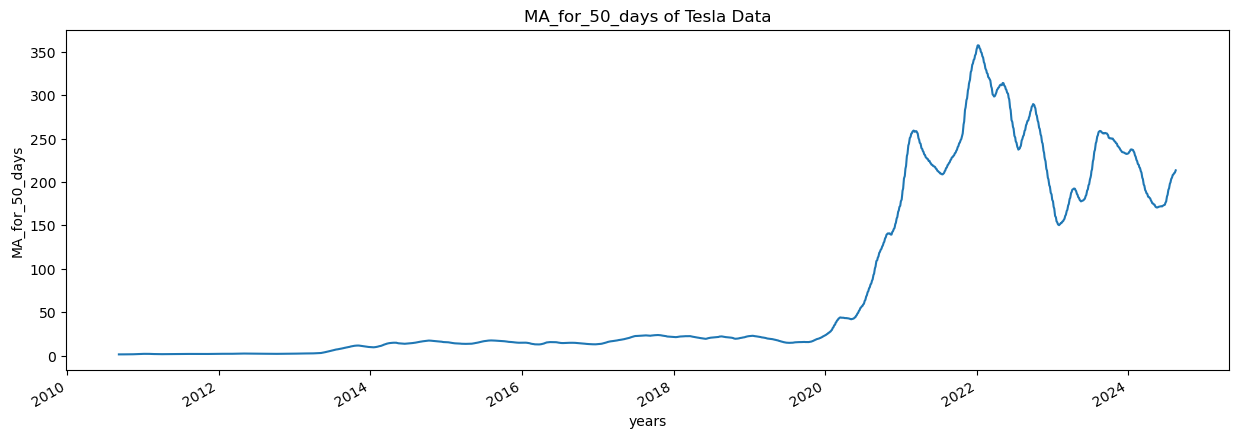

In [19]:
plot_graph((15,5), tesla_data['MA_for_50_days'], 'MA_for_50_days')

<Figure size 640x480 with 0 Axes>

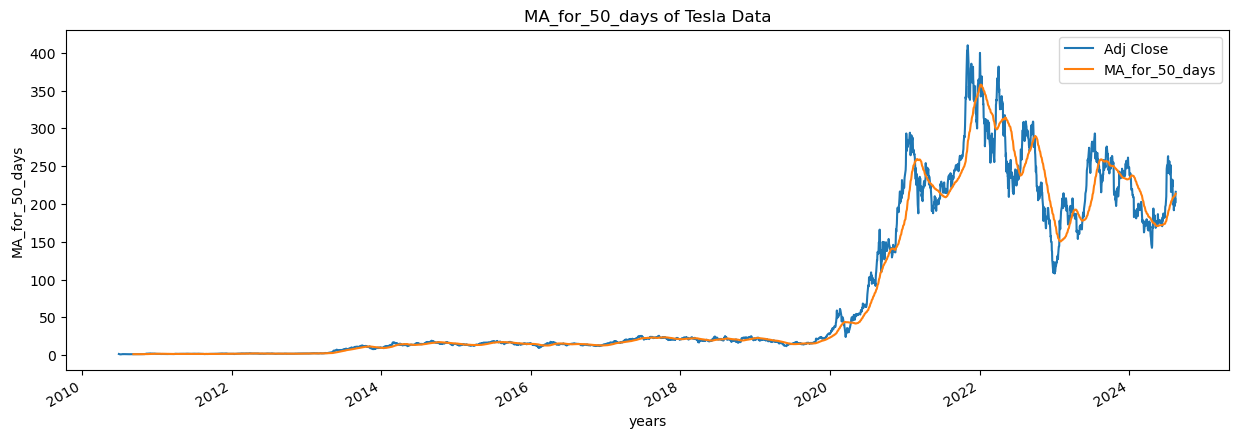

In [20]:
plot_graph((15,5), tesla_data[['Adj Close','MA_for_50_days']], 'MA_for_50_days')

In [21]:
tesla_data['MA_for_10_days'] = tesla_data['Adj Close'].rolling(10).mean()

<Figure size 640x480 with 0 Axes>

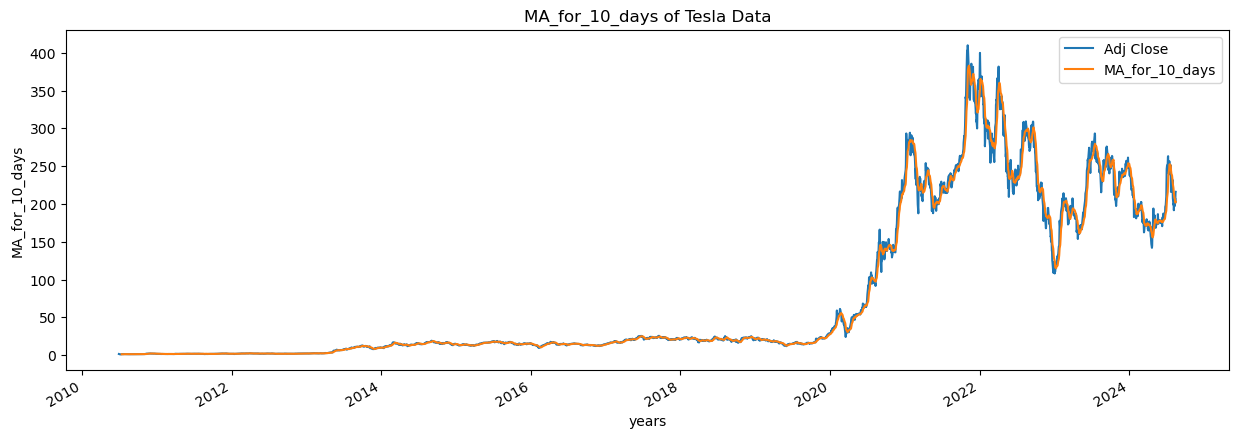

In [22]:
plot_graph((15,5), tesla_data[['Adj Close','MA_for_10_days']], 'MA_for_10_days')

<Figure size 640x480 with 0 Axes>

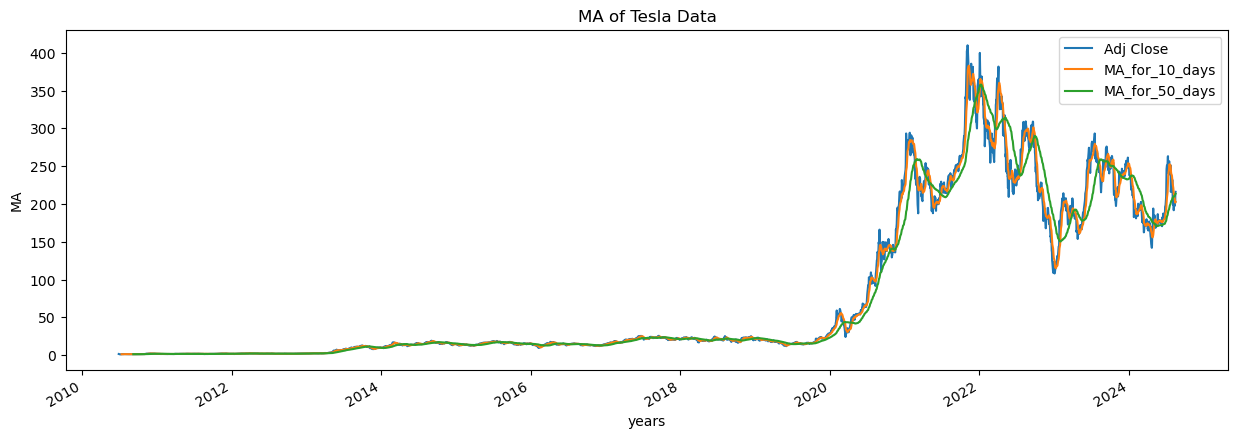

In [23]:
plot_graph((15,5), tesla_data[['Adj Close','MA_for_10_days', 'MA_for_50_days']], 'MA')

In [24]:
tesla_data['percentage_change_cp'] = tesla_data['Adj Close'].pct_change()
tesla_data[['Adj Close', 'percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2010-06-29,1.592667,NaN
2010-06-30,1.588667,-0.002511
2010-07-01,1.464000,-0.078473
2010-07-02,1.280000,-0.125683
2010-07-06,1.074000,-0.160937


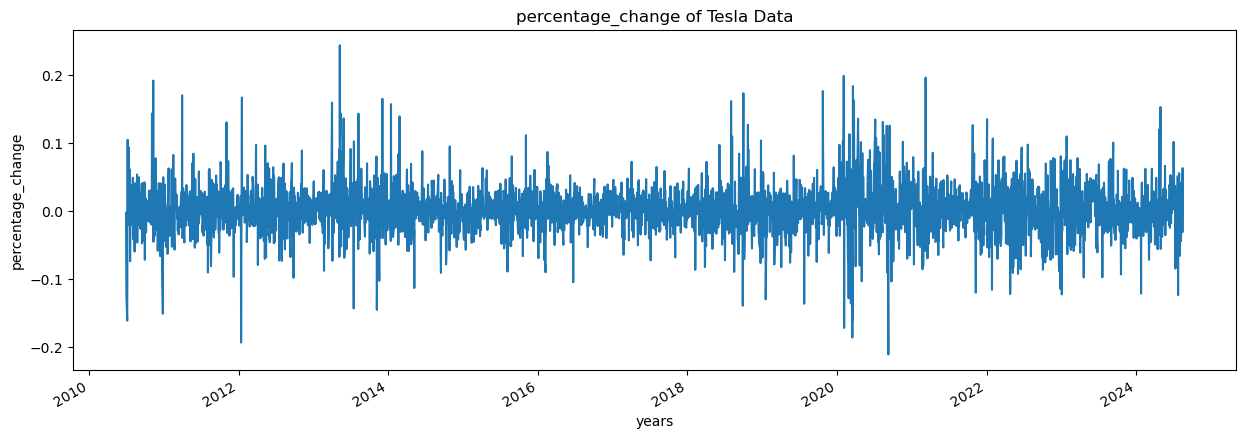

In [25]:
plot_graph((15,5),tesla_data['percentage_change_cp'],'percentage_change')

In [26]:
Adj_close_price = tesla_data[['Adj Close']]

In [27]:
max(Adj_close_price.values ), min(Adj_close_price.values )

(array([409.97000122]), array([1.05333304]))

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.48989608],
       [0.52110047],
       [0.52594252]])

In [29]:
len(scaled_data)

3558

In [30]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [31]:
x_data[0],y_data[0]

(array([[1.31893362e-03],
        [1.30915180e-03],
        [1.00428027e-03],
        [5.54310805e-04],
        [5.05407544e-05],
        [0.00000000e+00],
        [2.70634579e-04],
        [2.60852469e-04],
        [2.03792057e-04],
        [3.81495574e-04],
        [6.58652434e-04],
        [6.66803171e-04],
        [7.89077648e-04],
        [9.96129534e-04],
        [7.33645693e-04],
        [7.20604046e-04],
        [8.47769140e-04],
        [8.95047734e-04],
        [8.39618402e-04],
        [7.74404629e-04],
        [8.02119295e-04],
        [7.41799054e-04],
        [6.74953909e-04],
        [8.34727493e-04],
        [1.00264919e-03],
        [8.90156824e-04],
        [7.58100530e-04],
        [6.17893497e-04],
        [6.19524578e-04],
        [5.26596139e-04],
        [3.42368009e-04],
        [2.93458335e-04],
        [4.10841611e-04],
        [4.85837203e-04],
        [5.46160067e-04],
        [4.84206122e-04],
        [4.87468283e-04],
        [5.38006705e-04],
        [7.0

In [58]:
int(len(x_data)*0.8)

2766

In [59]:
3558-100-int(len(x_data)*0.8)

692

In [60]:
splitting_len = int(len(x_data)*0.8)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [61]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2766, 100, 1)
(2766, 1)
(692, 100, 1)
(692, 1)


In [36]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [63]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [64]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [91]:
model.fit(x_train, y_train, batch_size=1, epochs = 25)

Epoch 1/25
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 148s 54ms/step - loss: 1.5656e-04
Epoch 2/25
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 148s 53ms/step - loss: 9.0599e-05
Epoch 3/25
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 148s 53ms/step - loss: 1.3209e-04
Epoch 4/25
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 147s 53ms/step - loss: 1.3971e-04
Epoch 5/25
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 147s 53ms/step - loss: 1.4318e-04
Epoch 6/25
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 147s 53ms/step - loss: 1.7762e-04
Epoch 7/25
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 147s 53ms/step - loss: 1.1267e-04
Epoch 8/25
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 147s 53ms/step - loss: 1.0221e-04
Epoch 9/25
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 1744s 631ms/step - loss: 1.0969e-04
Epoch 10/25
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 155s 56ms/step - loss: 1.2768e-04
Epoch 11/25
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 156s 56ms/step - loss: 1.4066e-04
Epoch 12/25
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 156s 56ms/step - loss: 1.1920e-04
Epoch 13/25
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 143s 52ms/step - loss: 9.3142e-05
Epoch 

In [92]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [93]:
predictions = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [80]:
predictions

array([[0.8642378 ],
       [0.85093224],
       [0.88436013],
       [0.9097191 ],
       [0.9221659 ],
       [0.95715994],
       [0.97083807],
       [0.93668884],
       [0.94247276],
       [0.90639716],
       [0.9518087 ],
       [0.9509989 ],
       [0.92221576],
       [0.9145579 ],
       [0.85321563],
       [0.8503827 ],
       [0.8757833 ],
       [0.89227074],
       [0.8487718 ],
       [0.86337656],
       [0.8140179 ],
       [0.8128811 ],
       [0.8201407 ],
       [0.7836358 ],
       [0.79287827],
       [0.7616093 ],
       [0.7962411 ],
       [0.8471866 ],
       [0.89861566],
       [0.92639786],
       [0.9260344 ],
       [0.9229861 ],
       [0.9051583 ],
       [0.89170146],
       [0.99915373],
       [0.95542365],
       [0.9289552 ],
       [0.8991623 ],
       [0.86224824],
       [0.8848955 ],
       [0.88627523],
       [0.9268497 ],
       [0.8690495 ],
       [0.89147955],
       [0.86368364],
       [0.841777  ],
       [0.8397651 ],
       [0.796

In [94]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[345.4497  ],
       [334.70477 ],
       [352.36356 ],
       [360.35077 ],
       [368.7436  ],
       [380.02438 ],
       [385.0861  ],
       [366.47513 ],
       [369.15247 ],
       [349.55365 ],
       [378.31567 ],
       [373.40503 ],
       [367.68237 ],
       [355.3582  ],
       [329.89648 ],
       [330.14432 ],
       [344.61032 ],
       [357.08182 ],
       [335.03036 ],
       [340.4793  ],
       [313.11777 ],
       [319.4016  ],
       [320.4117  ],
       [309.8177  ],
       [311.8994  ],
       [297.76572 ],
       [315.66153 ],
       [338.64886 ],
       [364.5578  ],
       [372.26776 ],
       [367.48212 ],
       [360.59573 ],
       [351.4135  ],
       [347.20764 ],
       [399.59814 ],
       [378.39435 ],
       [371.4027  ],
       [342.16846 ],
       [334.98615 ],
       [344.04608 ],
       [352.49133 ],
       [371.59454 ],
       [341.1944  ],
       [352.5738  ],
       [332.33426 ],
       [331.75308 ],
       [326.31754 ],
       [312.2

In [96]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[337.79666138],
       [351.57666016],
       [363.00332642],
       [365.45999146],
       [379.01998901],
       [385.62332153],
       [369.67666626],
       [372.        ],
       [360.64001465],
       [378.99667358],
       [381.58666992],
       [365.        ],
       [361.5333252 ],
       [338.32333374],
       [336.33666992],
       [350.58334351],
       [356.32000732],
       [334.6000061 ],
       [339.01000977],
       [322.13665771],
       [319.50332642],
       [325.32998657],
       [308.97332764],
       [310.85665894],
       [299.98001099],
       [312.84332275],
       [336.29000854],
       [355.66665649],
       [364.64666748],
       [362.82333374],
       [362.06332397],
       [356.77999878],
       [352.26000977],
       [399.92666626],
       [383.19665527],
       [362.70666504],
       [354.8999939 ],
       [342.32000732],
       [352.70666504],
       [354.79998779],
       [368.73999023],
       [343.85333252],
       [349.86999512],
       [343

In [97]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [98]:
rmse

10.516733159135569

In [89]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = tesla_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2021-11-15,337.796661,354.454590
2021-11-16,351.576660,349.013733
2021-11-17,363.003326,362.682953
2021-11-18,365.459991,373.052643
2021-11-19,379.019989,378.142334


<Figure size 640x480 with 0 Axes>

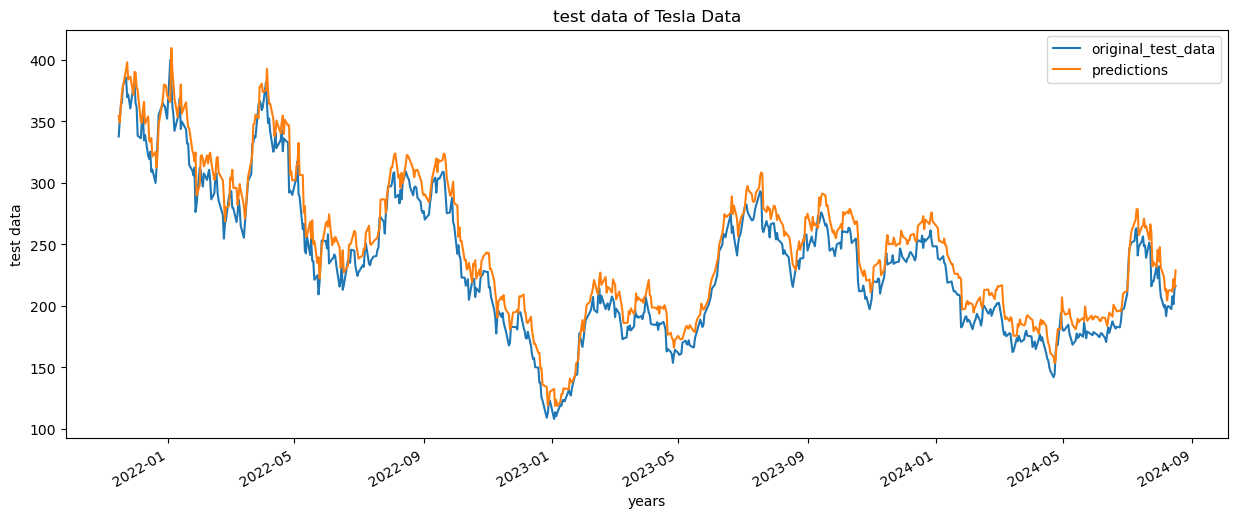

In [99]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

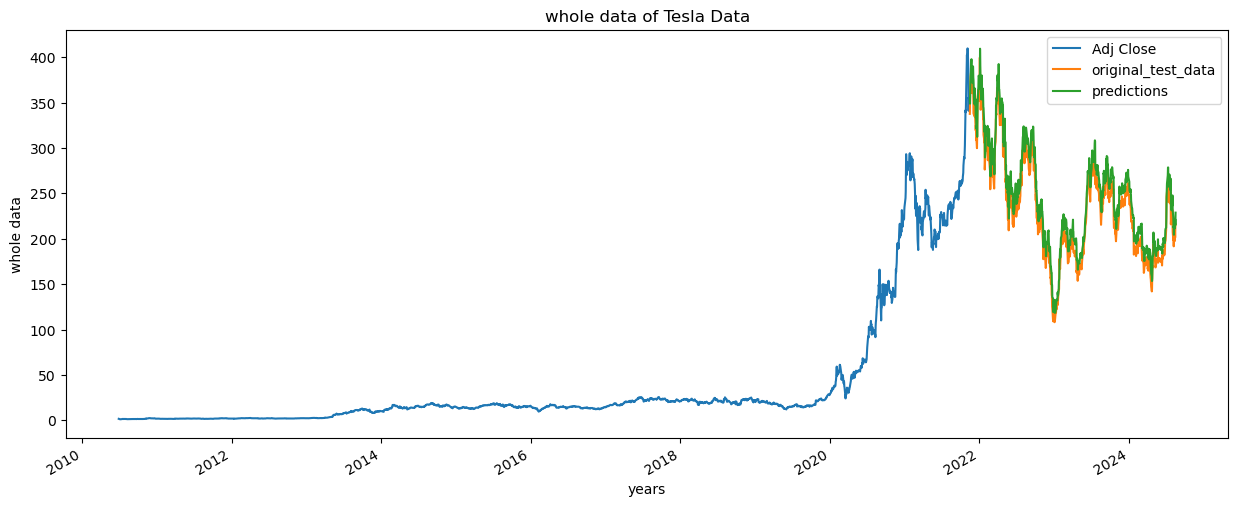

In [100]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [101]:
model.save("Latest_stock_price_model.keras")